<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/laboratory_exercise_2_26_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [ ]:
data = pd.read_csv('/content/sample_data/user_behavior_data.csv')
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3


Preprocess the input and the output variables appropriately.

In [ ]:
data['User Behavior Class'].isnull().sum()

0

Explore the dataset using visualizations of your choice.

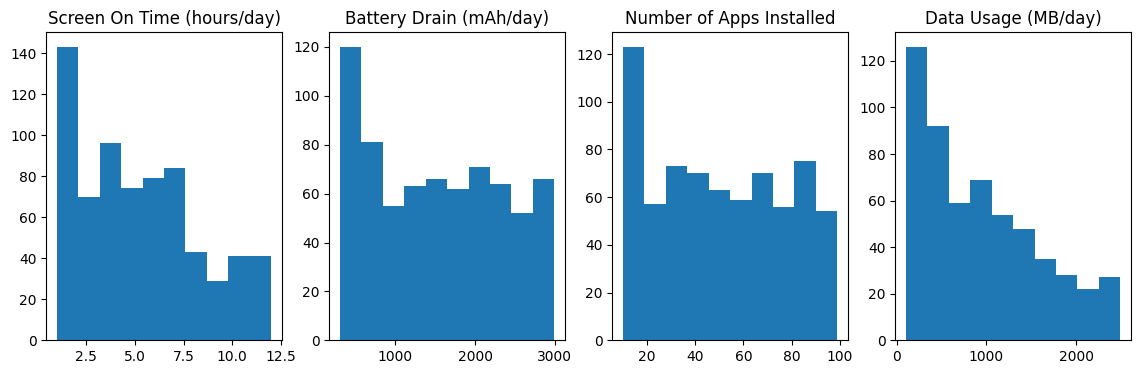

In [ ]:
numerical = ['Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']
plt.figure(figsize=(14,4))

for i in range(0,len(numerical)):
  plt.subplot(1, len(numerical), i+1)
  plt.hist(data[numerical[i]], bins=10)
  plt.title(numerical[i])

# None of the numerical features are normally distributed

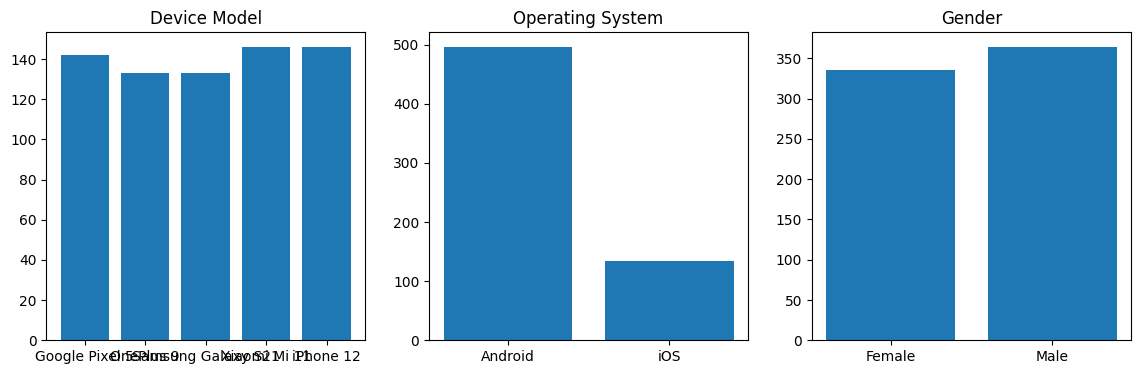

In [ ]:
categorical = ['Device Model', 'Operating System', 'Gender']
plt.figure(figsize=(14,4))

for i in range(0,len(categorical)):
  plt.subplot(1, len(categorical), i+1)
  counts = data.groupby(categorical[i]).size()
  plt.bar(counts.index.astype(str), counts)
  plt.title(categorical[i])

# The categorical features are somewhat balanced, except for Operating System. If we have to impute missing values frequent imputer would not be a good choice.

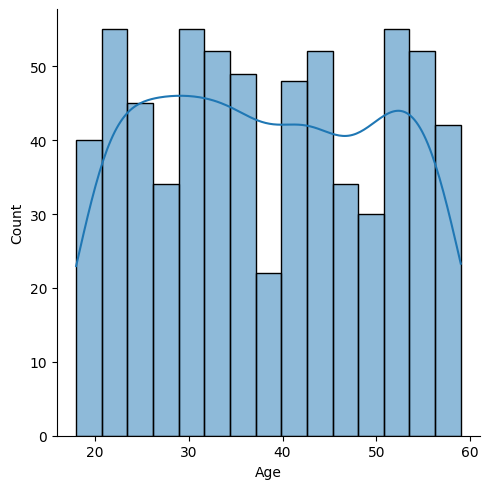

In [ ]:
sns.displot(data['Age'], kde=True, bins=15)
# Age is not normally distributed

Check if the dataset is balanced.

In [ ]:
data['User Behavior Class'].value_counts()
# The dataset is pretty balanced

,count
User Behavior Class,
2,146
3,143
4,139
5,136
1,136


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
data.isnull().mean() * 100

,0
User ID,0.0
Device Model,0.0
Operating System,10.0
App Usage Time (min/day),0.0
Screen On Time (hours/day),0.0
Battery Drain (mAh/day),0.0
Number of Apps Installed,0.0
Data Usage (MB/day),20.0
Age,5.0
Gender,0.0


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

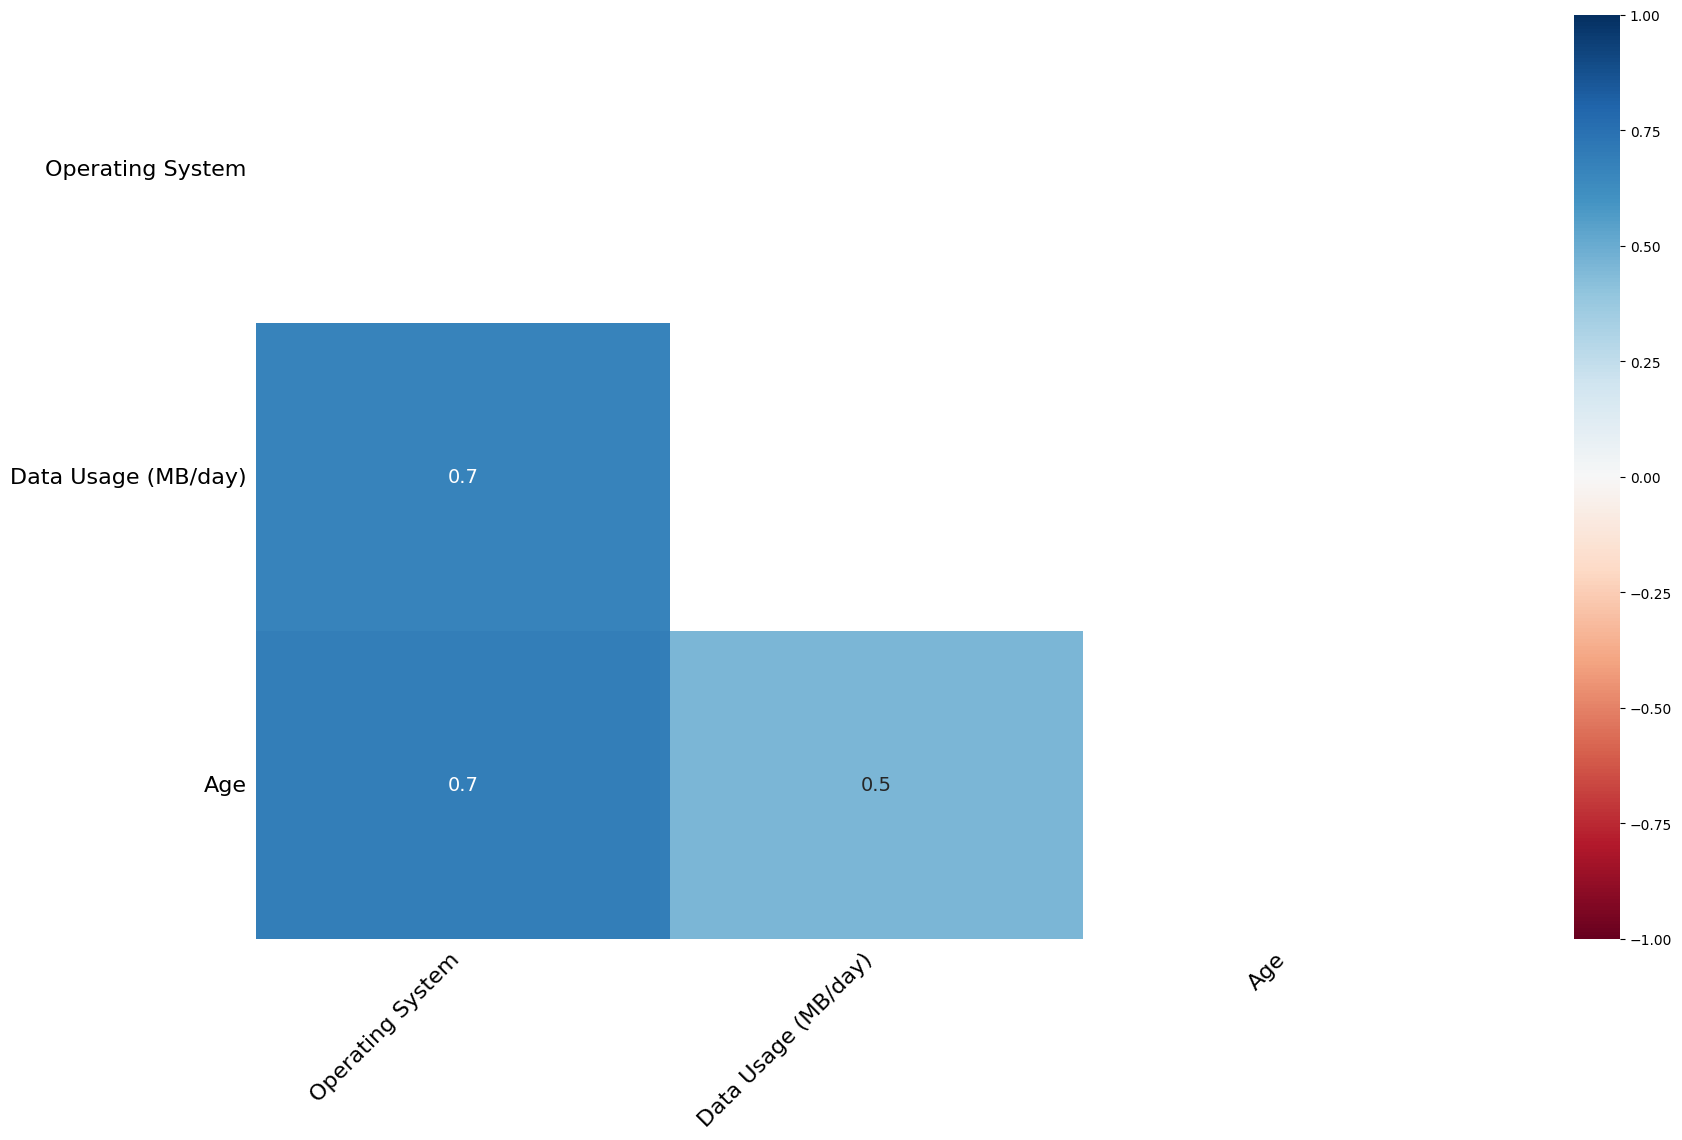

In [ ]:
msno.heatmap(data)
plt.show()

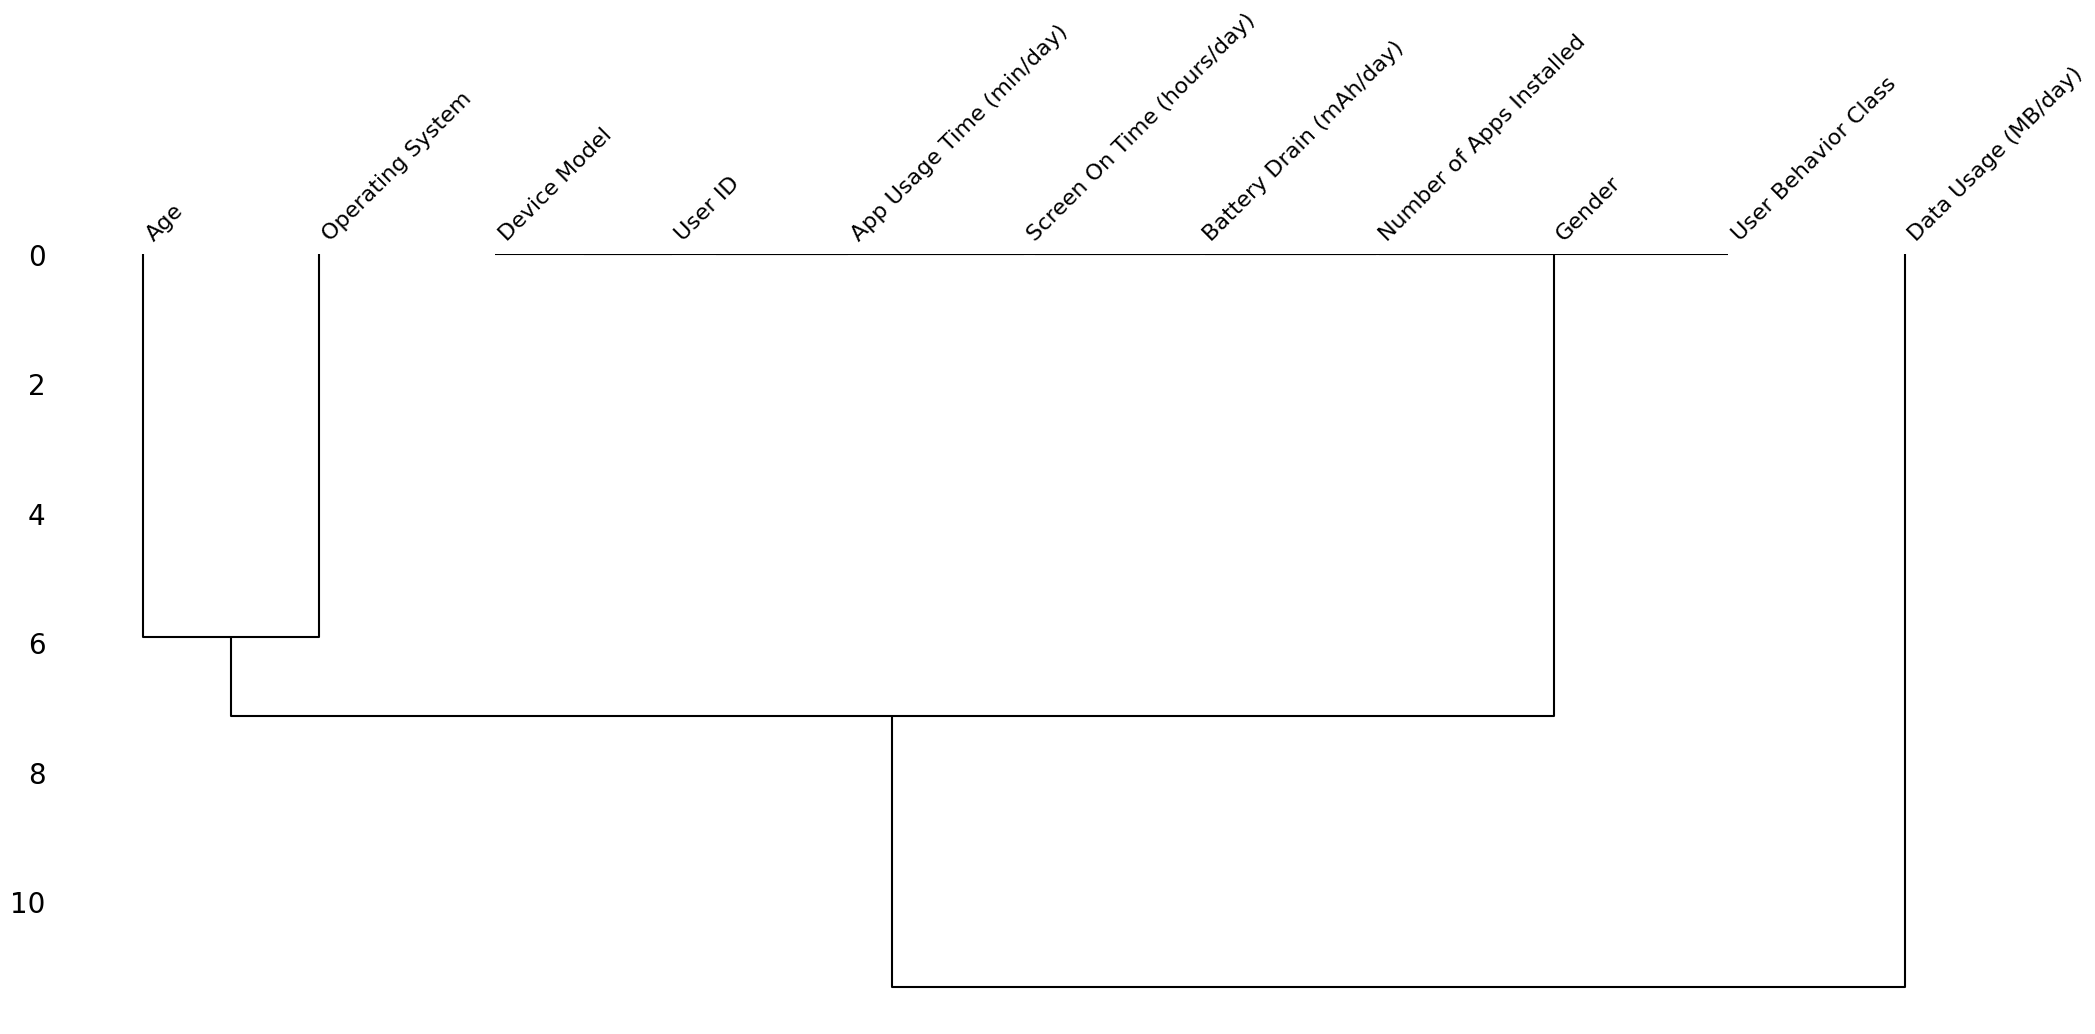

In [ ]:
msno.dendrogram(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

# Handling MAR Data

Encoding the data

In [ ]:
enc_data = ['Device Model', 'Operating System', 'Gender']
encoder = LabelEncoder()

for feature in enc_data:
  encoded = encoder.fit_transform(data[feature])
  data[feature] = encoded

In [ ]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122.0,40.0,1,4
1,2,1,0,268,4.7,1331,42,944.0,47.0,0,3
2,3,3,0,154,4.0,761,32,NaN,42.0,1,2
3,4,0,0,239,4.8,1676,56,871.0,20.0,1,3
4,5,4,1,187,4.3,1367,58,988.0,31.0,0,3


In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(data[['Operating System','Age','Data Usage (MB/day)']])
data[['Operating System','Age','Data Usage (MB/day)']] = imputed_data

In [ ]:
data.isnull().mean() * 100

,0
User ID,0.0
Device Model,0.0
Operating System,0.0
App Usage Time (min/day),0.0
Screen On Time (hours/day),0.0
Battery Drain (mAh/day),0.0
Number of Apps Installed,0.0
Data Usage (MB/day),0.0
Age,0.0
Gender,0.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[1:-1]], data[data.columns[-1]], test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# For this exercise i will be using Decision Tree model which does not require Feature Scaling.

## Model Selection

Choose and train an approriate model for the given task.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

Use the trained model to make predictions for the test set.

In [ ]:
predictions = clf.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[31  0  0  0  0]
 [ 0 30  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 33  0]
 [ 0  0  0  0 34]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        34

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[1:-1]], data[data.columns[-1]], test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 1.0


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        12

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

